In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_path = 'C:/Users/admin/Documents/Material/BTECH PROJECT/Dump/GINI/spotgarbage-GINI/spotgarbage/images'
img_size = 128

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (img_size, img_size),
                                                 batch_size = 32,
                                                 class_mode ='categorical',subset='training')
test_set = test_datagen.flow_from_directory(train_path,
                                            target_size = (img_size, img_size),
                                            batch_size = 32,
                                            class_mode ='categorical',subset='validation')

Found 2454 images belonging to 2 classes.
Found 490 images belonging to 2 classes.


In [4]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[img_size, img_size, 3]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
model_details=model.fit(x=training_set, validation_data=test_set, batch_size = 32, epochs = 30, steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/30
77/77 [==============================] - 208s 2s/step - loss: 0.7277 - accuracy: 0.6211 - val_loss: 0.6048 - val_accuracy: 0.6531
Epoch 2/30
77/77 [==============================] - 134s 2s/step - loss: 0.5770 - accuracy: 0.6826 - val_loss: 0.5719 - val_accuracy: 0.6918
Epoch 3/30
77/77 [==============================] - 123s 2s/step - loss: 0.5481 - accuracy: 0.7104 - val_loss: 0.4685 - val_accuracy: 0.7939
Epoch 4/30
77/77 [==============================] - 110s 1s/step - loss: 0.4751 - accuracy: 0.7739 - val_loss: 0.4710 - val_accuracy: 0.7755
Epoch 5/30
77/77 [==============================] - 109s 1s/step - loss: 0.4449 - accuracy: 0.7922 - val_loss: 0.4190 - val_accuracy: 0.8061
Epoch 6/30
77/77 [==============================] - 108s 1s/step - loss: 0.4513 - accuracy: 0.7883 - val_loss: 0.4265 - val_accuracy: 0.8041
Epoch 7/30
77/77 [==============================] - 115s 1s/step - loss: 0.4015 - accuracy: 0.8201 - val_loss: 0.3924 - val_accuracy: 0.8163
Epoch 8/30
77

In [8]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [9]:
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

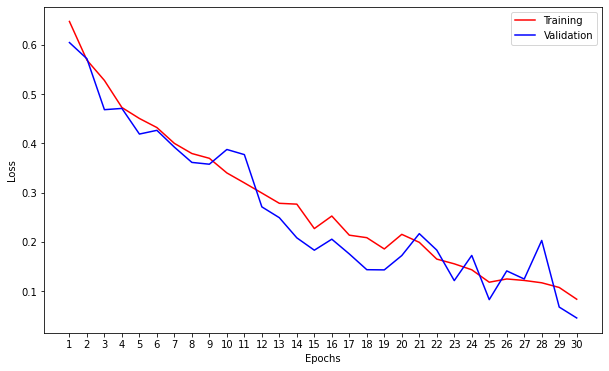

In [11]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

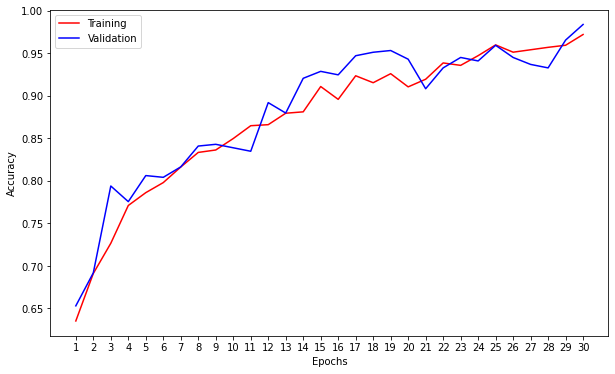

In [12]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

In [19]:
import numpy as np
from keras.preprocessing import image
img_path = 'C:/Users/Arpit/Desktop/Project/Datasets/sample-spotgarbage-GINI/spotgarbage/test/garbage-queried-images/c3d74078-6799-11e5-ba3c-40f2e96c8ad8.jpg'
test_image = image.load_img(img_path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0]>result[0][1]:
  print("Garbage")
else:
  print("Non-Garbage")

Garbage


In [13]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
open("cnn_dump.tflite", 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\admin\AppData\Local\Temp\tmpheaqryui\assets


29589712